# Decision Trees

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Dataset Location
dataset = 'Task7_DataSet'
file_name_train = '01_train.csv'
file_name_test = '01_test.csv'

file_name_train = os.path.join(dataset, file_name_train)
file_name_test = os.path.join(dataset, file_name_test)

In [3]:
# Data Preparation

class DataPrep:
    def __init__(self, filename, normalize=True):
        self.filename = filename
        self.normalize = normalize
        self.data = pd.read_csv(self.filename)
        self.x, self.y = self.prepare_data()
        
    def normalize_data(self):
        self.x = self.x.apply(lambda x : x - np.mean(x) / np.std(x), axis= 1)
    
    def prepare_data(self):
        self.x = self.data.iloc[:,:-1]
        self.y = self.data.iloc[: ,-1]
        if self.normalize:
            self.normalize_data()
        # Returning Numpy Arrays for Faster Computation
        return self.x.values, self.y.values
        
    
        
    
    

In [4]:
train = DataPrep(file_name_train, False)
test = DataPrep(file_name_test, False)

In [5]:
len(train.y)
print(len(train.x))
print(len(train.y))
print(np.unique(train.y))
print(len(train.x[0]))


3891
3891
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
9


## Decision Tree

In [6]:
class DecisionTree:
    def __init__(self, X, Y, max_depth=10):
        self.X = X
        self.Y = Y
        self.max_depth = max_depth
        self.n = len(X)
        self.features = len(X[0])
        self.classes = np.unique(Y)
        self.tree = []
    
    
    def gini_score(self, groups, y_groups):
        total_values = sum(len(g) for g in groups)
        gini_score = 0.0
        for i in range(len(groups)):
            group = groups[i]
            y_group = y_groups[i]
            group_size = float(len(group))
            if group_size == 0.0:
                continue
            gini_score_group = 0.0
            for i in self.classes:
                propotion = (y_group == i).sum() / group_size
                gini_score_group += propotion * propotion

            gini_score += ( 1.0 - gini_score_group ) * ( group_size/total_values)
        return gini_score
    
    
    def test_split(self, column_index, value, dataset, y_data):
        left = []
        right = []
        y_left = []
        y_right = []
        
        for i in range(len(dataset)):
            if dataset[i][column_index] < value:
                left.append(dataset[i])
                y_left.append(y_data[i])
            else:
                right.append(dataset[i])
                y_right.append(y_data[i])
        
        return ( np.array(left), np.array(right) ) , ( np.array(y_left), np.array(y_right) )

    
    def get_best_split(self, dataset, y_data):
        best_gini_score, best_index, best_value, best_groups = float("inf"), 999, 999, []
        for index in range(self.features):
            i = 0 
            for row in dataset:
                i+=1
                groups, y_groups = self.test_split(index, row[index], dataset, y_data)
                gini_score = self.gini_score(groups, y_groups)
                if gini_score < best_gini_score:
                    best_gini_score, best_index, best_value, best_groups, best_y_groups  = gini_score, index, row[index], groups, y_groups
        
        return {'index':best_index, 'value':best_value, 'groups':best_groups, 'y_groups' : best_y_groups}

    
    # Create a terminal node value
    def make_terminal_node(self,group):
        '''
        Returns element which occured maximum number of times
        '''
        group = group.tolist()
        return max(np.unique(group), key=group.count)

    
    def split(self, node, depth):
        print('Building Tree of Current Depth : {}'.format(depth))
        left, right = node['groups']
        y_left, y_right = node['y_groups']
        del node['groups']
        del node['y_groups']
        
        if not len(left) or not len(right):
            node['left'] = node['right'] = self.make_terminal_node(np.append(y_left,y_right))
            return
        
        if depth >= self.max_depth:
            node['left'], node['right'] = self.make_terminal_node(y_left), self.make_terminal_node(y_right)
            return
        
        
        node['left'] = self.get_best_split(left, y_left)
        self.split(node['left'], depth+1)
        
        node['right'] = self.get_best_split(right, y_right)
        self.split(node['right'], depth+1)
    
    
    def build_tree(self):
        root = self.get_best_split(self.X, self.Y)
        self.split(root, 1)
        self.tree = root
        
    
    def get_accuracy_score(self):
        accuracy = 0
        for i in range(len(self.y_predicted)):
            if int(self.y_predicted[i]) == int(self.y_test[i]):
                accuracy += 1
            
        return float(accuracy * 100/len(self.y_predicted))
        
    
    def __make__prediction__(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.__make__prediction__(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.__make__prediction__(node['right'], row)
            else:
                return node['right']
    
    
    def predict(self,test_x, test_y):
        self.y_predicted = []
        self.y_test = test_y
        self.x_test = test_x
        for row in test_x:
            self.y_predicted.append( self.__make__prediction__(self.tree, row) )
        
        
        return self.y_predicted
            
    




In [ ]:
accuracy_vs_height = []


In [13]:

for height in range(1,6):
    print('Generating Decision Tree of Height : {}'.format(height) )
    decision_tree = DecisionTree(train.x, train.y,max_depth=height)
    decision_tree.build_tree()
    predcited_y = decision_tree.predict(test.x, test.y)
    accuracy_vs_height.append( ( height, decision_tree.get_accuracy_score()) )
    



Generating Decision Tree of Height : 1
Building Tree of Current Depth : 1
Generating Decision Tree of Height : 2
Building Tree of Current Depth : 1
Building Tree of Current Depth : 2
Building Tree of Current Depth : 2
Generating Decision Tree of Height : 3
Building Tree of Current Depth : 1
Building Tree of Current Depth : 2
Building Tree of Current Depth : 3
Building Tree of Current Depth : 3
Building Tree of Current Depth : 2
Building Tree of Current Depth : 3
Building Tree of Current Depth : 3
Generating Decision Tree of Height : 4
Building Tree of Current Depth : 1
Building Tree of Current Depth : 2
Building Tree of Current Depth : 3
Building Tree of Current Depth : 4
Building Tree of Current Depth : 4
Building Tree of Current Depth : 3
Building Tree of Current Depth : 4
Building Tree of Current Depth : 4
Building Tree of Current Depth : 2
Building Tree of Current Depth : 3
Building Tree of Current Depth : 4
Building Tree of Current Depth : 4
Building Tree of Current Depth : 3
Buil

In [8]:
accuracy_vs_height

[(5, 99.2289899768697),
 (6, 98.84348496530455),
 (7, 98.66358262657414),
 (8, 98.22667694680031),
 (9, 97.81547160113081),
 (10, 97.35286558725264)]

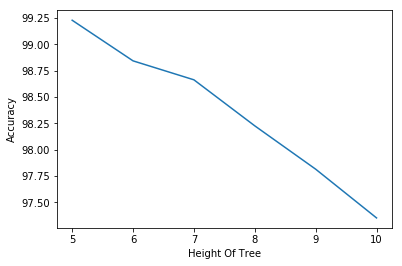

In [12]:
plt.plot([row[0] for row in accuracy_vs_height], [row[1] for row in accuracy_vs_height])
plt.xlabel('Height Of Tree')
plt.ylabel('Accuracy')
plt.show()